In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [112]:
# Define main project folder
main = r'C:\Users\Do Thu An\OneDrive\Desktop\Dynamic Macroeconomics\Problem sets\Dynamic-Macroeconomics\PS2_Code'
# Set project folder as current working directory
os.chdir(main)

# Define data file path
data_path = os.path.join(main, 'Data Files', 'VHLSS 2008 Data')

In [113]:
# Load muc123a
muc123a = pd.read_csv(os.path.join(data_path, 'muc123a.csv'))

# Create household size column
muc123a['hsize'] = muc123a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['matv'].transform('max')

# Keep only household heads who are male and age ≥ 25
muc123a = muc123a[(muc123a['m1ac3'] == 1) & (muc123a['m1ac2'] == 1) & (muc123a['m1ac5'] >= 25)]

# Keep relevant columns
columns123a = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'hsize', 'm1ac2', 'm1ac3', 'm1ac5']
df = muc123a[columns123a].copy()

In [114]:
'''
# Define income-related columns and filter existing ones
income_cols = ['m4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25']
income_cols = [col for col in income_cols if col in muc4a.columns]

# Compute individual income (handle missing columns)
muc4a['indi_income'] = muc4a[income_cols].sum(axis=1) if income_cols else 0

# Compute total household income
hh_income = muc4a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['indi_income'].sum().reset_index()
hh_income.rename(columns={'indi_income': 'hh_income'}, inplace=True)

# Merge total household income
muc4a = muc4a.merge(hh_income, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Define work-related columns and filter existing ones
work_cols = ['m4ac6', 'm4ac7', 'm4ac8', 'm4ac16', 'm4ac17', 'm4ac18']
work_cols = [col for col in work_cols if col in muc4a.columns]

# Fill NaN values with 0 to avoid multiplication errors
muc4a[work_cols] = muc4a[work_cols].fillna(0)

# Compute total working hours for first and secondary jobs
muc4a['total_hours_first'] = muc4a['m4ac6'] * muc4a['m4ac7'] * muc4a['m4ac8']
muc4a['total_hours_second'] = muc4a['m4ac16'] * muc4a['m4ac17'] * muc4a['m4ac18']

# Compute total individual working hours
muc4a['indi_work_hours'] = muc4a['total_hours_first'] + muc4a['total_hours_second']

# Compute total household working hours
hh_work_hours = muc4a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['indi_work_hours'].sum().reset_index()
hh_work_hours.rename(columns={'indi_work_hours': 'hh_work_hours'}, inplace=True)

# Merge total household working hours
muc4a = muc4a.merge(hh_work_hours, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Fill any remaining NaN values
muc4a.fillna(0, inplace=True)

# Merge with the main dataframe
df = df.merge(muc4a, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv'], how='left')
'''

"\n# Define income-related columns and filter existing ones\nincome_cols = ['m4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25']\nincome_cols = [col for col in income_cols if col in muc4a.columns]\n\n# Compute individual income (handle missing columns)\nmuc4a['indi_income'] = muc4a[income_cols].sum(axis=1) if income_cols else 0\n\n# Compute total household income\nhh_income = muc4a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['indi_income'].sum().reset_index()\nhh_income.rename(columns={'indi_income': 'hh_income'}, inplace=True)\n\n# Merge total household income\nmuc4a = muc4a.merge(hh_income, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')\n\n# Define work-related columns and filter existing ones\nwork_cols = ['m4ac6', 'm4ac7', 'm4ac8', 'm4ac16', 'm4ac17', 'm4ac18']\nwork_cols = [col for col in work_cols if col in muc4a.columns]\n\n# Fill NaN values with 0 to avoid multiplication errors\nmuc4a[work_cols] = muc4a[work_cols].fillna(0)\n\n# Compute total working hours for 

In [115]:
def merge_wealth(df, file_name, columns, value_cols, new_col_name):
    # Load the wealth dataset with selected columns
    data = pd.read_csv(os.path.join(data_path, file_name))[columns]
    # Fill missing values with zero
    data.fillna(0, inplace=True)
    # Calculate household wealth
    if 'm6ac7' in data.columns:  # If percentage ownership column exists (for fixed assets)
        data['m6ac7'] = data['m6ac7'] / 100  # Convert percentage to decimal
        data[new_col_name] = data['m6ac3'] * data['m6ac6'] * data['m6ac7']
    else:  # For durable goods (no ownership percentage)
        data[new_col_name] = data['m6bc3'] * data['m6bc6']

    # Group by household to get total wealth per household
    wealth = data.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])[new_col_name].sum().reset_index()

    # Merge aggregated wealth data into the main dataframe
    return df.merge(wealth, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

In [116]:
# Merge wealth data from fixed assets (6A)
# Define the required columns (household identifiers + selected variables)
# m6ac3: quantity of the assets, m6ac6: assets' value at current price, m6ac7: percentage of ownership
df = merge_wealth(df, 'muc6a.csv', ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm6ac3', 'm6ac6', 'm6ac7'], ['m6ac3', 'm6ac6', 'm6ac7'], 'HH_wealth')


# Fill missing values with zero and compute total household wealth
df['HH_wealth'] = df['HH_wealth'].fillna(0)
df['HH_Wealth'] = df['HH_wealth']

# ******************** CALCULATE TOTAL HOUSEHOLD CONSUMPTION (EXPENDITURES) *******************************************
# Function to process and merge expenditure data
def merge_expenditure(df, file_name, columns, expense_cols, new_col_name):
    data = pd.read_csv(os.path.join(data_path, file_name))[columns] # Load the expenditure datasets with selected columns
    exp = data.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])[expense_cols].sum().reset_index() # Group the columns by household ID
    exp[new_col_name] = exp[expense_cols].sum(axis=1) # Take the sum of the expenses by households
    exp = exp.drop_duplicates(subset=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], keep='first') # Remove any duplicates, only keep a unique expense values for each household ID
    return df.merge(exp, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left') # Merge the datasets to the dataframe df

In [117]:
# Merge all expenditure files

# Load household expenditure of food and drinks during holidays (5A1)
# Define the required columns (household identifiers + selected variables)
# m5a1c2b: expense bought, m5a1c3b: expense self supplied or received
df = merge_expenditure(df, 'muc5a1.csv', ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5a1c2b', 'm5a1c3b'], ['m5a1c2b', 'm5a1c3b'], 'HH_exp1')

# Load household daily expenditure on food and drinks (5A2)
# Define the required columns (household identifiers + selected variables)
# m5a2c6: expense bought, m5a2c10: expense self supplied or received
df = merge_expenditure(df, 'muc5a2.csv', ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5a2c6', 'm5a2c10'], ['m5a2c6', 'm5a2c10'], 'HH_exp2')

# Load household daily expenditure on nonfood and others
# Define the required columns (household identifiers + selected variables)
# m5b1c4: expense recieved, m5b1c5: annual expense
df = merge_expenditure(df, 'muc5b1.csv', ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5b1c4', 'm5b1c5'], ['m5b1c4', 'm5b1c5'], 'HH_exp3')

# Load household annual consumption expenditure
# Define the required columns (household identifiers + selected variables)
# m5b2c2: expense bought, m5b2c3: expense self supplied or received
df = merge_expenditure(df, 'muc5b2.csv', ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5b2c2', 'm5b2c3'], ['m5b2c2', 'm5b2c3'], 'HH_exp4')

# Load other spending that is considered as household expenditure
# Define the required columns (household identifiers + selected variables)
# m5b3c2: annual expense
df = merge_expenditure(df, 'muc5b3.csv', ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5b3c2'], ['m5b3c2'], 'HH_exp5')

# Load household's accomodation expenditure
# Define the required columns (household identifiers + selected variables)
# m7c32: annual water expense, m7c36: annual electricity expense , m7c39: annual garbage collection expense (Expenses)
muc7 = pd.read_csv(os.path.join(data_path, 'muc7.csv'))
columns7 = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm7c32', 'm7c36', 'm7c39']
muc7 = muc7[columns7]
muc7['HH_exp6'] = muc7[['m7c32', 'm7c36', 'm7c39']].sum(axis=1)
muc7.fillna(0, inplace=True)
df = df.merge(muc7, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

In [118]:
# Aggregate total household consumption expenditure (sum of HH_exp1 to HH_exp6)
df['HH_consumption'] = (
    df['HH_exp1'] + df['HH_exp2'] + df['HH_exp3'] +
    df['HH_exp4'] + df['HH_exp5'] + df['HH_exp6']
)

# Calculate the average household consumption 
df['HH_consumption_avr'] = df['HH_consumption']/ df['hsize']

# Rename 'm1ac5' to 'age'
df.rename(columns={'m1ac5': 'age'}, inplace=True)

In [119]:
# Load and process income file
muc4a = pd.read_csv(os.path.join(data_path, 'muc4a.csv'))

# Create household size column
muc4a['hsize'] = muc4a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['matv'].transform('max')

# Select the required columns
columns = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'm4ac6', 'm4ac7', 'm4ac8', 'm4ac11', 
             'm4ac12f', 'm4ac16', 'm4ac17', 'm4ac18', 'm4ac21', 'm4ac22f', 'm4ac25', 'hsize']
muc4aa = muc4a[columns].copy()

# Define income-related columns and filter existing ones
income_cols = ['m4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25']
income_cols = [col for col in income_cols if col in muc4aa.columns]

# Compute individual income (handle missing columns)
muc4aa['indi_income'] = muc4aa[income_cols].sum(axis=1) if income_cols else 0


# Compute total household income
hh_income = muc4aa.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['indi_income'].sum().reset_index()
hh_income.rename(columns={'indi_income': 'HH_Income'}, inplace=True)

# Merge total household income
muc4aa = muc4aa.merge(hh_income, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# If we have a duplicate column, drop the old column to avoid confusion
if 'indi_income_total' in muc4aa.columns:
    muc4aa.drop(columns=['indi_income'], inplace=True)

# Rename merged income column to avoid ambiguity
muc4aa.rename(columns={'indi_income_total': 'indi_income'}, inplace=True)

# Filter out individuals with no income (indi_income <= 0)
muc4aa = muc4aa[muc4aa['indi_income'] > 0]

# Create a new column 'working_individuals' to count the number of working individuals per household
# Group by household and count the number of non-zero income individuals (working individuals)
muc4aa['working_individuals'] = muc4aa.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['matv'].transform('count')

# If you want to keep 'hsize' as the number of working individuals per household, calculate that based on 'working_individuals'
muc4aa['hsize_working'] = muc4aa.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['working_individuals'].transform('max')

# Define work-related columns and filter existing ones
work_cols = ['m4ac6', 'm4ac7', 'm4ac8', 'm4ac16', 'm4ac17', 'm4ac18']
work_cols = [col for col in work_cols if col in muc4aa.columns]

# Fill NaN values with 0 to avoid multiplication errors
muc4aa[work_cols] = muc4aa[work_cols].fillna(0)

# Compute total working hours for first and secondary jobs
muc4aa['total_hours_first'] = muc4aa['m4ac6'] * muc4aa['m4ac7'] * muc4aa['m4ac8']
muc4aa['total_hours_second'] = muc4aa['m4ac16'] * muc4aa['m4ac17'] * muc4aa['m4ac18']

# Compute total individual working hours
muc4aa['indi_work_hours'] = muc4aa['total_hours_first'] + muc4aa['total_hours_second']

# Filter out individuals with no working hour (indi_work_hours <= 0)
muc4aa = muc4aa[muc4aa['indi_work_hours'] > 0]

# Compute total household working hours
hh_work_hours = muc4aa.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['indi_work_hours'].sum().reset_index()
hh_work_hours.rename(columns={'indi_work_hours': 'hh_work_hours'}, inplace=True)

# Merge total household working hours
muc4aa = muc4aa.merge(hh_work_hours, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Compute the average working hours by dividing 'hh_work_hours' by 'hsize_working'
muc4aa['avg_work_hours'] = muc4aa['hh_work_hours'] / muc4aa['hsize_working']

# Remove duplicates from the muc4aa dataframe
muc4aa.drop_duplicates(subset = ['tinh', 'huyen', 'xa', 'diaban', 'hoso'], keep = 'first', inplace=True)

# Fill any remaining NaN values
muc4aa.fillna(0, inplace=True)

# Select the required columns to keep
cols = ['tinh', 'huyen', 'xa', 'diaban', 'hoso','indi_income', 'HH_Income', 'hsize_working', 'indi_work_hours', 'hh_work_hours', 'avg_work_hours']
muc4aa = muc4aa[cols]

muc4aa

,tinh,huyen,xa,diaban,hoso,indi_income,HH_Income,hsize_working,indi_work_hours,hh_work_hours,avg_work_hours
0,101,1,3,1,13,18550.0,18550.0,1,2496.0,2496.0,2496.000000
1,101,1,3,1,14,42351.0,56468.0,2,2496.0,4320.0,2160.000000
3,101,1,3,1,15,42351.0,42351.0,1,2496.0,2496.0,2496.000000
4,101,1,9,19,19,22040.0,22040.0,1,2208.0,2208.0,2208.000000
5,101,1,9,19,20,33979.0,47203.0,2,2112.0,3952.0,1976.000000
...,...,...,...,...,...,...,...,...,...,...,...
9349,823,13,1,4,13,6646.0,17327.0,2,2800.0,4560.0,2280.000000
9351,823,13,1,4,15,10507.0,10507.0,1,1600.0,1600.0,1600.000000
9352,823,13,11,4,13,30871.0,60738.0,2,1812.0,3180.0,1590.000000
9354,823,13,12,25,15,19978.0,27677.0,3,2000.0,4060.0,1353.333333


In [120]:
df = df.merge(muc4aa, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')
df.dropna(inplace = True)

df.columns

Index(['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'hsize', 'm1ac2',
       'm1ac3', 'age', 'HH_wealth', 'HH_Wealth', 'm5a1c2b', 'm5a1c3b',
       'HH_exp1', 'm5a2c6', 'm5a2c10', 'HH_exp2', 'm5b1c4', 'm5b1c5',
       'HH_exp3', 'm5b2c2', 'm5b2c3', 'HH_exp4', 'm5b3c2', 'HH_exp5', 'm7c32',
       'm7c36', 'm7c39', 'HH_exp6', 'HH_consumption', 'HH_consumption_avr',
       'indi_income', 'HH_Income', 'hsize_working', 'indi_work_hours',
       'hh_work_hours', 'avg_work_hours'],
      dtype='object')

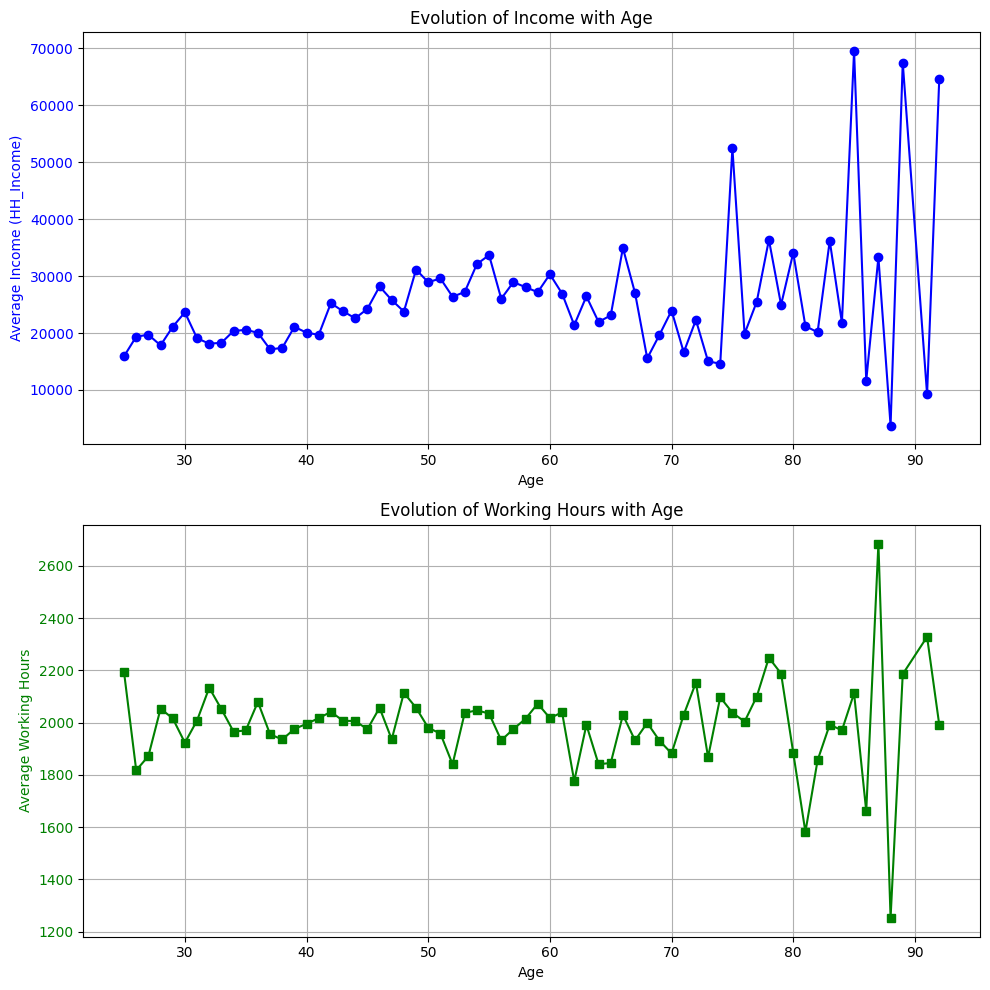

In [121]:
# Group by age and calculate the average total income and average working hours
income_by_age = df.groupby('age')['HH_Income'].mean()
work_hours_by_age = df.groupby('age')['avg_work_hours'].mean()

# Create two subplots stacked vertically (same column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the income in the first subplot
ax1.plot(income_by_age.index, income_by_age.values, color='blue', label='Average Income', linestyle='-', marker='o')
ax1.set_xlabel('Age')
ax1.set_ylabel('Average Income (HH_Income)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Evolution of Income with Age')
ax1.grid(True)

# Plot the working hours in the second subplot
ax2.plot(work_hours_by_age.index, work_hours_by_age.values, color='green', label='Average Working Hours', linestyle='-', marker='s')
ax2.set_xlabel('Age')
ax2.set_ylabel('Average Working Hours', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_title('Evolution of Working Hours with Age')
ax2.grid(True)

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()

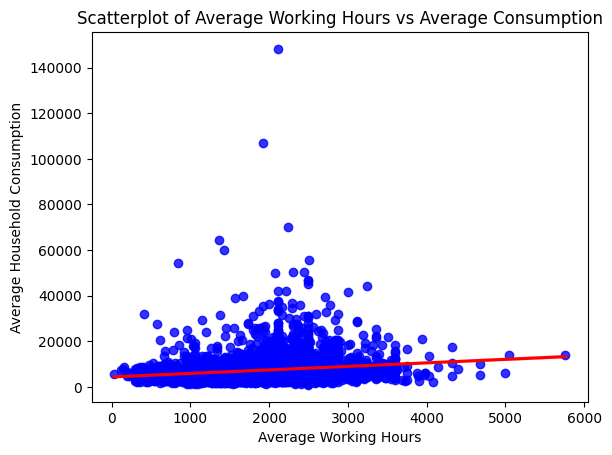

In [122]:
# Save the scatter plot figure
file_path = r'C:\Users\Do Thu An\OneDrive\Desktop\Dynamic Macroeconomics\Problem sets\Dynamic-Macroeconomics\PS2_Code\Household Model\output\figures\scatter_avg_work_hours_vs_avg_consumption.png'

# Scatter plot of average consumption vs average working hours
sns.regplot(data=df, x='avg_work_hours', y='HH_consumption_avr', scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Scatterplot of Average Working Hours vs Average Consumption')
plt.xlabel('Average Working Hours')
plt.ylabel('Average Household Consumption')
# Save the figure with the specified filename
plt.savefig(file_path)
plt.show()

In [123]:
# Adding a constant to the independent variable for the OLS model
X = sm.add_constant(df['avg_work_hours'])

# Dependent variable
y = df['HH_consumption_avr']

# OLS model fit
ols_model = sm.OLS(y, X).fit()

# Display OLS regression summary
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HH_consumption_avr   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     112.4
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           6.14e-26
Time:                        20:28:38   Log-Likelihood:                -42824.
No. Observations:                4230   AIC:                         8.565e+04
Df Residuals:                    4228   BIC:                         8.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4413.9235    305.051     14.469      0.000    3815.862    5011.985
avg_work_hours     1.5423      0.145     10.602      0.000       1.257       1.827
==============================================================================
Omnibus:                     5358.429   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1798916.511
Skew:                           6.616   Prob(JB):                         0.00
Kurtosis:                     103.157   Cond. No.                     6.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

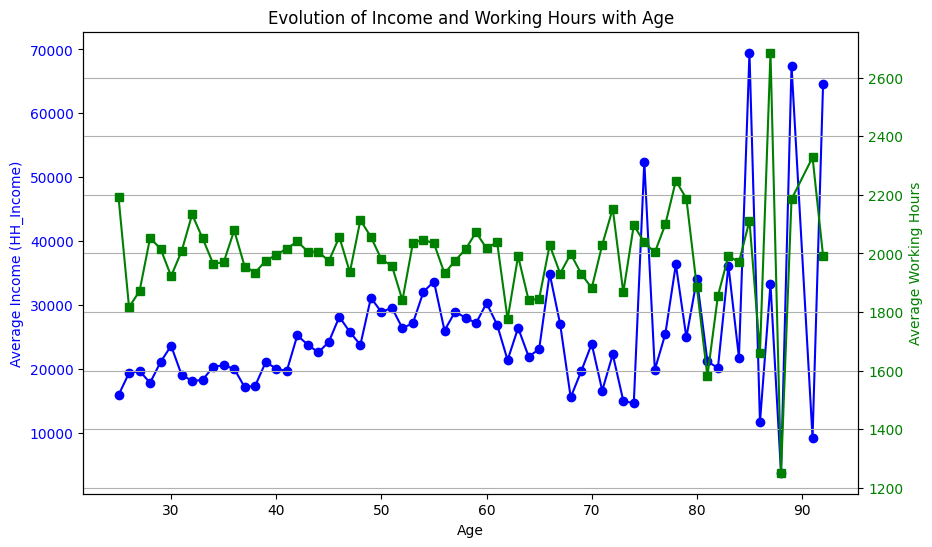

In [124]:
# Plot two line graphs to see how income and working hours evolve with age
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the income
ax1.plot(income_by_age.index, income_by_age.values, color='blue', label='Average Income', linestyle='-', marker='o')
ax1.set_xlabel('Age')
ax1.set_ylabel('Average Income (HH_Income)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot working hours
ax2 = ax1.twinx()
ax2.plot(work_hours_by_age.index, work_hours_by_age.values, color='green', label='Average Working Hours', linestyle='-', marker='s')
ax2.set_ylabel('Average Working Hours', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and show the plot
plt.title('Evolution of Income and Working Hours with Age')
plt.grid(True)
plt.show()

In [125]:
# Assuming df and the necessary columns are already available

# Group by age and compute the average household consumption
consumption_by_age = df.groupby('age')['HH_consumption_avr'].mean()

# Compute the log of income, handle missing values 
df['log_income'] = np.log(df['HH_Income'].replace(0, np.nan))  # replace 0 with NaN to avoid taking log(0)

# Group by age and calculate the average log income for each age group
log_income_by_age = df.groupby('age')['log_income'].mean()

# Exponentiate the average log income to get G_t for each age
G_t = np.exp(log_income_by_age)

# Grouping by age and computing the average working hours
work_hours_by_age = df.groupby('age')['hh_work_hours'].mean()

# Create a new DataFrame with age, associated G_t, average working hours, and average household consumption
Gt_df = pd.DataFrame({'age': log_income_by_age.index, 'G_t': G_t, 'avg_work_hours': work_hours_by_age.values})

# Merge average household consumption to Gt_df
Gt_df['avg_consumption'] = consumption_by_age.values

# Reset index for G_t_df to make 'age' a column instead of an index
Gt_df.reset_index(drop=True, inplace=True)

Gt_df


,age,G_t,avg_work_hours,avg_consumption
0,25,9588.999868,2844.047619,8081.388912
1,26,9827.771315,2267.500000,6391.018846
2,27,10759.763808,2743.634146,6502.839919
3,28,9407.035797,3073.034483,6196.209803
4,29,12887.171287,2973.487179,6508.873926
...,...,...,...,...
62,87,33296.000000,5370.000000,6990.550000
63,88,3766.000000,1252.000000,5137.900000
64,89,66835.002596,6556.000000,9238.447143
65,91,9241.000000,4656.000000,1289.011111


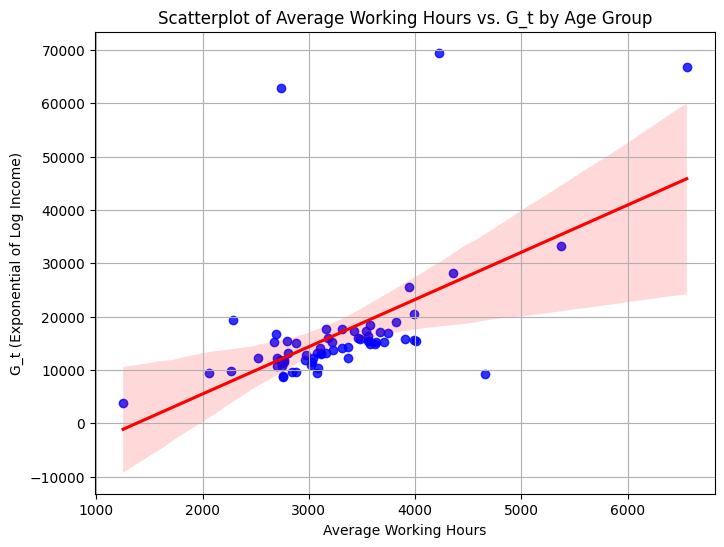

In [126]:
# Scatter plot between avg_work_hours and G_t, with a regression line
plt.figure(figsize=(8,6))
sns.regplot(x='avg_work_hours', y='G_t', data=Gt_df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Scatterplot of Average Working Hours vs. G_t by Age Group')
plt.xlabel('Average Working Hours')
plt.ylabel('G_t (Exponential of Log Income)')
plt.grid(True)
plt.show()

In [127]:
# OLS regression
X = sm.add_constant(Gt_df['avg_work_hours'])  # Add constant to the model
y = Gt_df['G_t']

model = sm.OLS(y, X).fit()
ols_table = model.summary()
ols_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    G_t   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     30.03
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           7.41e-07
Time:                        20:28:39   Log-Likelihood:                -709.57
No. Observations:                  67   AIC:                             1423.
Df Residuals:                      65   BIC:                             1428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.222e+04   5420.437     -2.255      0.028    -2.3e+04   -1395.133
avg_work_hours     8.8580      1.616      5.480      0.000       5.630      12.086
==============================================================================
Omnibus:                       82.247   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              870.237
Skew:                           3.674   Prob(JB):                    1.07e-189
Kurtosis:                      19.054   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

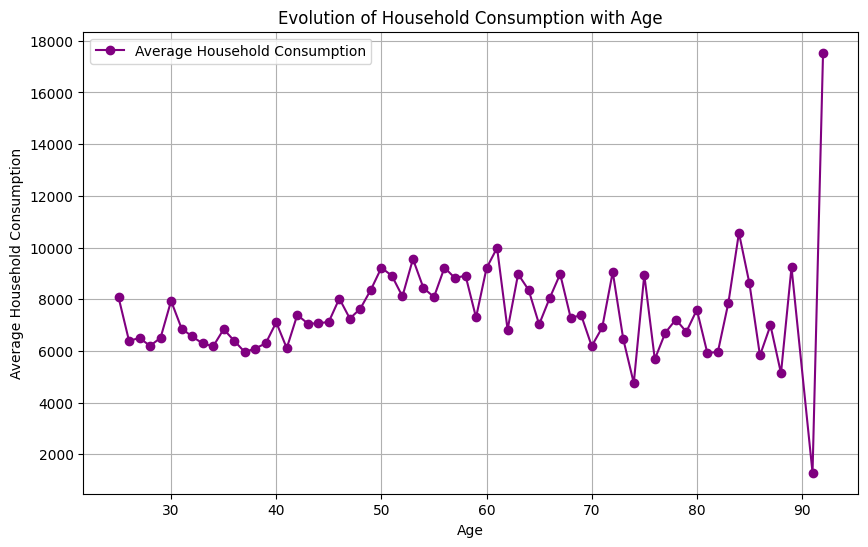

In [128]:
# Group by age and compute the average household consumption
consumption_by_age = df.groupby('age')['HH_consumption_avr'].mean()

# Plot the average household consumption with age
plt.figure(figsize=(10, 6))
plt.plot(consumption_by_age.index, consumption_by_age.values, color='purple', label='Average Household Consumption', linestyle='-', marker='o')
plt.title('Evolution of Household Consumption with Age')
plt.xlabel('Age')
plt.ylabel('Average Household Consumption')
plt.grid(True)
plt.legend()
plt.show()


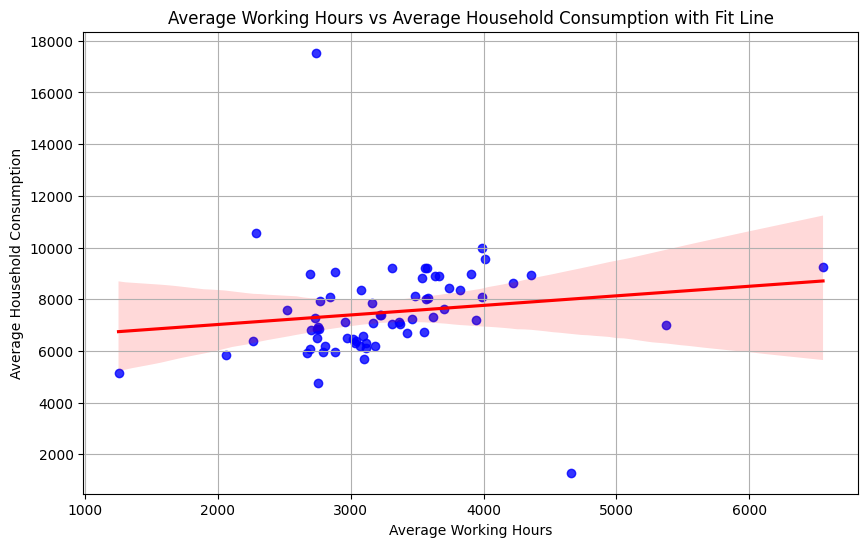

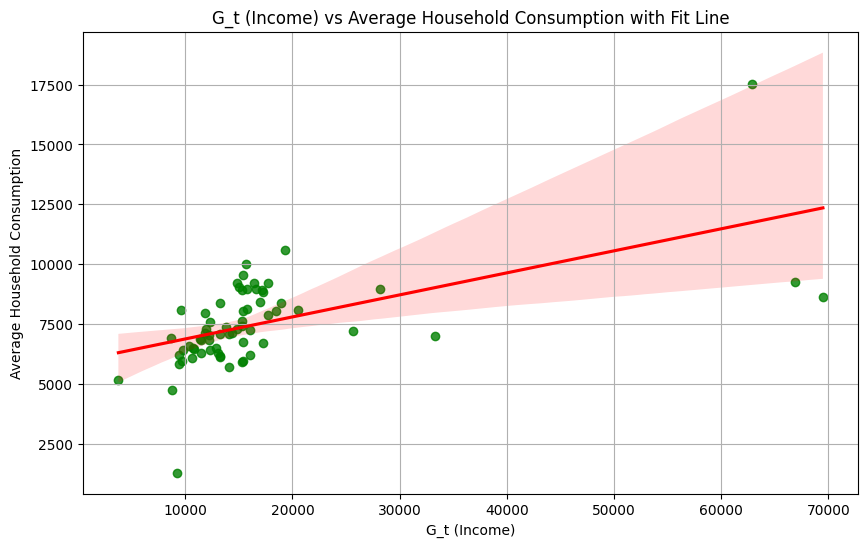

In [129]:
# Plot 1: Scatterplot of average working hours and average household consumption with a fit line
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_work_hours', y='avg_consumption', data=Gt_df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Average Working Hours vs Average Household Consumption with Fit Line')
plt.xlabel('Average Working Hours')
plt.ylabel('Average Household Consumption')
plt.grid(True)
plt.show()

# Plot 2: Scatterplot of G_t (income) and average household consumption with a fit line
plt.figure(figsize=(10, 6))
sns.regplot(x='G_t', y='avg_consumption', data=Gt_df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title('G_t (Income) vs Average Household Consumption with Fit Line')
plt.xlabel('G_t (Income)')
plt.ylabel('Average Household Consumption')
plt.grid(True)
plt.show()

In [130]:
# OLS Regression 1: Average household consumption (dependent) vs Average working hours by age group (independent)
X1 = sm.add_constant(Gt_df['avg_work_hours'])  # Add constant to the model
y1 = Gt_df['avg_consumption']

# Fit the OLS model for average consumption vs working hours
model1 = sm.OLS(y1, X1).fit()

# OLS Regression 2: Average household consumption (dependent) vs G_t (income) by age group (independent)
X2 = sm.add_constant(Gt_df['G_t'])  # Add constant to the model
y2 = Gt_df['avg_consumption']

# Fit the OLS model for average consumption vs G_t (income)
model2 = sm.OLS(y2, X2).fit()

# Get the OLS summary tables
ols_table1 = model1.summary()
ols_table2 = model2.summary()

ols_table1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_consumption   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.379
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.245
Time:                        20:28:40   Log-Likelihood:                -599.98
No. Observations:                  67   AIC:                             1204.
Df Residuals:                      65   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6284.0672   1056.023      5.951      0.000    4175.043    8393.091
avg_work_hours     0.3698      0.315      1.174      0.245      -0.259       0.999
==============================================================================
Omnibus:                       52.188   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.243
Skew:                           1.833   Prob(JB):                    6.51e-114
Kurtosis:                      16.163   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
ols_table2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_consumption   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     30.53
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           6.23e-07
Time:                        20:28:40   Log-Likelihood:                -587.78
No. Observations:                  67   AIC:                             1180.
Df Residuals:                      65   BIC:                             1184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5951.3108    339.810     17.514      0.000    5272.663    6629.958
G_t            0.0920      0.017      5.525      0.000       0.059       0.125
==============================================================================
Omnibus:                       11.124   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               33.320
Skew:                           0.032   Prob(JB):                     5.82e-08
Kurtosis:                       6.454   Cond. No.                     3.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
# Create another new dataframe with only aggregated household income, consumption and wealth
data = df[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'hsize', 'm1ac2',
           'm1ac3', 'age', 'indi_income', 'HH_Income', 'hsize_working', 'indi_work_hours', 'hh_work_hours',
            'avg_work_hours', 'HH_consumption', 'HH_consumption_avr', 'HH_Wealth']].copy()

# Save output to csv file
output_path = r'C:\Users\Do Thu An\OneDrive\Desktop\Dynamic Macroeconomics\Problem sets\Dynamic-Macroeconomics\PS2_Code\Household Model\df_hh.csv'
output_path2 = r'C:\Users\Do Thu An\OneDrive\Desktop\Dynamic Macroeconomics\Problem sets\Dynamic-Macroeconomics\PS2_Code\Household Model\data_processed.csv'
data.to_csv(output_path2, index=False, encoding='utf-8-sig')
df.to_csv(output_path, index=False, encoding='utf-8-sig')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Do Thu An\\OneDrive\\Desktop\\Dynamic Macroeconomics\\Problem sets\\Dynamic-Macroeconomics\\PS2_Code\\Household Model\\data_processed.csv'